<a href="https://colab.research.google.com/github/salmanromeo/CS_5783_Machine_Learning_Fall_2022/blob/main/CS_5783_Fall_2022_Assignment_2_Neural_Neworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question 1**

#####Derive the update rule and show how to train a 2-layer (1 hidden layer and 1 output layer) neural network with backpropagation for regression using the Mean Square Error loss. Assume that you are using the Sigmoid activation function for the hidden layer. Explain briefly how this is different from the update rule for the network trained for binary classification using log loss.

**Answer 1**

In [149]:
pip install nnv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


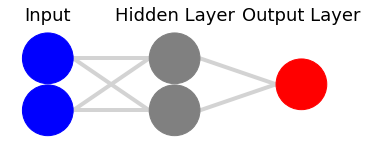

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f99ef082110>)

In [150]:
from nnv import NNV
layersList = [
    {"title":"Input", "units": 2, "color": "Blue"},
    {"title":"Hidden Layer", "units": 2},
    {"title":"Output Layer", "units": 1,"color": "Red"},
]
NNV(layersList).render()

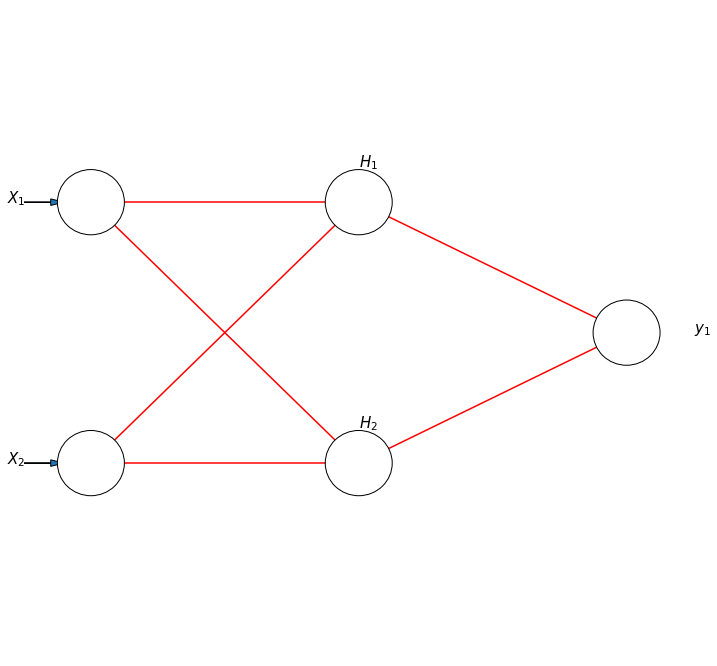

In [151]:
# I use https://gist.github.com/craffel/2d727968c3aaebd10359

import matplotlib.pyplot as plt

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):

  n_layers = len(layer_sizes)
  v_spacing = (top - bottom)/float(max(layer_sizes))
  h_spacing = (right - left)/float(len(layer_sizes) - 1)
  # Input-Arrows
  layer_top_0 = v_spacing*(layer_sizes[0] - 1)/2. + (top + bottom)/2.
  for m in range(layer_sizes[0]):
      plt.arrow(left-0.18, layer_top_0 - m*v_spacing, 0.12, 0,  lw =1, head_width=0.01, head_length=0.02)
  # Nodes
  for n, layer_size in enumerate(layer_sizes):
      layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
      for m in range(layer_size):
          circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/8.,\
                              color='w', ec='k', zorder=4)
  # Add texts
          if n == 0:
              plt.text(left-0.125, layer_top - m*v_spacing, r'$X_{'+str(m+1)+'}$', fontsize=15)
          elif (n_layers == 3) & (n == 1):
              plt.text(n*h_spacing + left+0.00, layer_top - m*v_spacing+ (v_spacing/8.+0.01*v_spacing), r'$H_{'+str(m+1)+'}$', fontsize=15)
          elif n == n_layers -1:
              plt.text(n*h_spacing + left+0.10, layer_top - m*v_spacing, r'$y_{'+str(m+1)+'}$', fontsize=15)
          ax.add_artist(circle)
  # Edges
  for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
      layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
      layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
      for m in range(layer_size_a):
          for o in range(layer_size_b):
              line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='r')
              ax.add_artist(line)

fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [2, 2, 1])
fig.savefig('nn.png')

#####Let x be the input features and y be the output features. Now define the weights (parameters) of the neural network. <br>

#####First layer weight $w_1$ and bias $b_1$. <br>
#####Second layer weight $w_2$ and bias $b_2$. <br>
#####The output of layer 1 is <br>
\begin{align}
      z_1 = w_1x + b_1 \\
      a_1 = g(z_1)
    \end{align}
#####where "g" is the activation function. We have used sigmoid function in hidden layer. <br>
\begin{align}
      a_1 = sig(z_1)
    \end{align}
#####The output of layer 2 using linear activation function is <br>
\begin{align}
      z_2 = w_2a_1 + b_2 \\
      a_2 = z_2
    \end{align}
#####The O/P of the neural network is <br>
\begin{align}
      \hat y = a_2
    \end{align}

#####Now find $\frac{\delta L} {\delta w_2}$ to update the second layer. <br>
#####Here Mean Squared Error (MSE) loss function is,
\begin{align}
      L = \frac{1} {2n}\sum_{i=1}^n (\hat y - y_i)^{2} = \frac{1} {2n}\sum_{i=1}^n (a_2 - y_i)^{2}
    \end{align}
#####So using chain rule we can write, <br>
\begin{align}
      \frac{\delta L} {\delta w_2} &= \frac{\delta L} {\delta a_2}\frac{\delta a_2} {\delta z_2}\frac{\delta z_2} {\delta w_2} \\
      &= \frac{\delta } {\delta a_2} [\frac{1} {2n}\sum_{i=1}^n (a_2 - y_i)^{2}]\frac{\delta z_2} {\delta z_2}\frac{\delta} {\delta w_2} (w_2a_1 + b_2)\\
      &= 2*\frac{1} {2n}\sum_{i=1}^n (a_2 - y_i)a_1\\
      &=\frac{1} {n}\sum_{i=1}^n (a_2 - y_i)a_1
    \end{align}
#####So the weight and bias, <br>
\begin{align}
      w_2 = w_2 - α \frac{\delta L} {\delta w_2} = w_2 - α [\frac{1} {n}\sum_{i=1}^n (a_2 - y_i)a_1] \\
      b_2 = b_2 - α \delta z_2 = b_2 - α [\frac{1} {n}\sum_{i=1}^n (a_2 - y_i)]
    \end{align}
#####where α is learning rate. <br>
#####Now find $\frac{\delta L} {\delta w_1}$ using chain rule. <br>
\begin{align}
      \frac{\delta L} {\delta w_1} &= \frac{\delta L} {\delta a_2}\frac{\delta a_2} {\delta z_2}\frac{\delta z_2} {\delta a_1} \frac{\delta a_1} {\delta z_1}\frac{\delta z_1} {\delta w_1}\\
      &= \frac{\delta } {\delta a_2} [\frac{1} {2n}\sum_{i=1}^n (a_2 - y_i)^{2}]\frac{\delta z_2} {\delta z_2}\frac{\delta } {\delta a_1} (w_2a_1 + b_2)\frac{\delta} {\delta z_1} sig(z_1)\frac{\delta} {\delta w_1} (w_1x + b_1)\\
      &= 2*\frac{1} {2n}\sum_{i=1}^n (a_2 - y_i)w_2sig(z_1)[1-sig(z_1)]x\\
      &= \frac{1} {n}\sum_{i=1}^n (a_2 - y_i)w_2sig(z_1)[1-sig(z_1)]x
    \end{align}
#####So the weight and bias, <br>
\begin{align}
      w_1 = w_1 - α \frac{\delta L} {\delta w_1} = w_1 - α [\frac{1} {n}\sum_{i=1}^n (a_2 - y_i)w_2sig(z_1)[1-sig(z_1)]x] \\
      b_1 = b_1 - α \delta z_1 = b_1 - α [\frac{1} {n}\sum_{i=1}^n (a_2 - y_i)w_2sig(z_1)[1-sig(z_1)]]
    \end{align}

#####For this 2 layer network (1 hidden layer and 1 output layer), we have used a sigmoid activation function in the hidden layer and a linear activation function in the output layer (Output is in between 0.0 to 1.0). For loss function, we have used the Mean Squared Error (MSE) loss function to update weights and biases. <br>
#####There are some differences from the update rule for the network trained for binary classification using log loss.
1. MSE is mainly used for regression functions where we will get continuous value as output. MSE is a straight-forward loss function while for classification task (i.e. output between 0.0 to 1.0), log loss is more preferrable.
2. If we use log loss for update rule, we have to deal with the difference between output prediction and actual output.
3. Example: Lets assume we have an actual label '1' but predicted value is '0'. In this case, MSE loss value will be 1 while using log loss, when x tends to 0, log loss tends to infinity which means MSE loss value is much less than log loss value.
4. Therefore, from the above discuss we can conclude that MSE doesn't strongly penalize misclassifications while log loss penalizes more when the output is very different from the expected value. 

**Question 2**

#####For the given data on canvas, construct a neural network for the regression task. Your network must have 1 hidden layer and 1 output layer. Use sigmoid to be your activation function for the hidden layer(s). You can choose the number of neurons in each layer using your intuition. <br>
#####The data is already split to have your input data for training (X_train.csv) and testing (X_train.csv) and their corresponding target values Y_train.csv and Y_test.csv, respectively. You can load the data as follows: <br>
#####X_train = np.loadtxt("X_train.csv") <br>
#####Implement the backpropagation algorithm and train your network until convergence.<br>
#####Answer the following questions:<br>

1.   What is the activation function that you will choose for the output layer? Justify your answer briefly.
2.   How many neurons should there be in the output layer? Why?
1.   Report the average MSE loss and the accuracy.
2.   Plot the loss and accuracy as a function of the number of iterations. 
1.   What is the effect of the learning rate on the training process? Vary the learning rate to be between 0.001 and 1.0 and plot the resulting accuracy as a function of learning rate.
2.   What is the effect of the number of neurons in the hidden layer? To answer this question, you will need to consider and answer the following:
> a. You will need to vary the number of neurons from 1 to 10. Does the update rule need to be changed/derived again? Why or why not? <br>
> b. Report your observations by reporting the final loss and plotting the true labels and your predicted labels, along with a brief (2-3 lines) description.
2.   What is the effect of the activation functions in the network? Explore two different activation functions other than sigmoid such as tanh, linear, or ReLU.
> a. Will you need to change the update rule?<br>
> b. What is the change that you need to make to achieve this experiment?<br>
> c. Report your observations by reporting the final loss and plotting the true labels and your predicted labels, along with a brief (2-3 lines) description.











**Answer 2**

**2.1 Activation function that I will choose for the output layer.**

#####Since it is a regression problem, we should use a linear activation for the output layer. Example: Sigmoid, tanh, RelU

**2.2 Number of neurons in the output layer**

The number of neurons in output layer should be 1 since we are predicting only one output value.

In [152]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import csv
import warnings

In [173]:
# Load Dataset
x_train = np.loadtxt("/content/drive/MyDrive/X_train.csv")
x_test = np.loadtxt("/content/drive/MyDrive/X_test.csv")
y_train = np.loadtxt("/content/drive/MyDrive/Y_train.csv")
y_test = np.loadtxt("/content/drive/MyDrive/Y_test.csv")
y_train = np.reshape(y_train, (100, 1))
y_test = np.reshape(y_test, (50, 1))

In [154]:
# Initialize input neurons
input_neurons = 2 
# Initialize hidden neurons              
hidden_neurons = 10
# Initialize output neuron
output_neurons = 1   
# Initialize the learning rate
learning_rate = 0.001
# Initialize epoch
epoch = 5000

In [155]:
# Initialize weight and bias for hidden layer
W_1 = np.random.rand(hidden_neurons, input_neurons)   
b_1 = np.random.rand(x_train.shape[0], hidden_neurons)
# Initialize weight and bias for output layer
W_2 = np.random.rand(output_neurons,hidden_neurons)
b_2 = np.random.rand(x_train.shape[0],output_neurons)
# print(W_1.shape, b_1.shape, W_2.shape, b_2.shape)

In [156]:
# Define Sigmoid activation function
def sig(x):
  y = 1/(1 + np.exp(-x))
  return y

In [157]:
# Define MSE
def MSE(y1, y2):
  L = np.mean((y1 - y2)**2)
  return L

In [158]:
loss_lst = []
for i in range(5000):
  z_1 = np.dot(x_train, W_1.T) + b_1
  a_1 = sig(z_1)
  z_2 = np.dot(a_1, W_2.T) + b_2
  a_2 = z_2  

  # Updating the weight and bias of hidden layer and output layer for sigmoid function
  dz_2 = (a_2 - y_train)
  dW_2 = np.dot(dz_2.T, a_1)
  db_2 = dz_2
  dz_1 = dz_2.dot(W_2).dot(a_1.T).dot(1-(a_1))
  dW_1 = dz_1.T.dot(x_train)
  db_1 = dz_1
  W_1 = W_1 - learning_rate*dW_1
  b_1 = b_1 - learning_rate*db_1
  W_2 = W_2 - learning_rate*dW_2
  b_2 = b_2 - learning_rate*db_2

  # Calculate loss
  MSE_loss = MSE(a_2, y_train)
  loss_lst.append(MSE_loss)

print("Average MSE loss for training data:", np.average(np.array(loss_lst)))
warnings.filterwarnings('ignore')

Average MSE loss for training data: 346.29076881589305


In [159]:
zT_1 = np.dot(x_test, W_1.T) + b_1[:50]
aT_1 = sig(zT_1)
zT_2 = np.dot(aT_1, W_2.T) + b_2[:50]
aT_2 = (zT_2)

lossT_lst = []
# Calculate loss
MSET_loss = MSE(aT_2, y_test)
lossT_lst.append(MSET_loss)

print("Average MSE loss for test data:", np.average(np.array(lossT_lst)))
warnings.filterwarnings('ignore')

Average MSE loss for test data: 5257.274763856887


**2.3 Report the average MSE loss and the accuracy**

#####As we are doing regression, we have used sigmoid activation function in the hidden layer and linear activation function in the output layer.We have used 10 neurons in the hidden layer and one neuron in the output layer. We did 5000 iterations with learning rate = 0.001. We use Mean square error loss function for calculating the loss. We found:
1. Average MSE on Train data: 346.29076881589305
2. Average MSE on Test data: 5257.274763856887

**2.4 Plot the loss and accuracy as a function of the number of iterations**

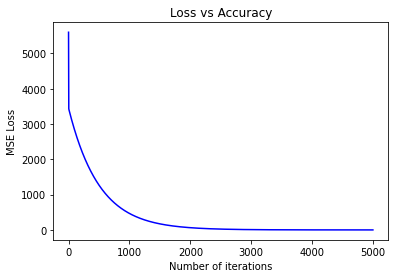

In [160]:
epoch_lst = np.arange(epoch)
plt.plot(epoch_lst, np.array(loss_lst), color = 'blue')
plt.xlabel('Number of iterations')
plt.ylabel('MSE Loss')
plt.title('Loss vs Accuracy')
plt.show()

#####From the figure, we can say that initially the accuracy was very low and loss was very high for training data. As the number of iterations increases, accuracy increases and loss decreases. After several iterations, the accuracy become constant for training datasets.

**2.5 Effect of the learning rate on the training process**

In [177]:
# Load Dataset
x_train = np.loadtxt("/content/drive/MyDrive/X_train.csv")
x_test = np.loadtxt("/content/drive/MyDrive/X_test.csv")
y_train = np.loadtxt("/content/drive/MyDrive/Y_train.csv")
y_test = np.loadtxt("/content/drive/MyDrive/Y_test.csv")
y_train = np.reshape(y_train, (100, 1))
y_test = np.reshape(y_test, (50, 1))

input_neurons = 2              
hidden_neurons = 10
output_neurons = 1   
epoch = 5000

def learningrate(learning_rate):

  W_1 = np.random.rand(hidden_neurons, input_neurons)   
  b_1 = np.random.rand(x_train.shape[0], hidden_neurons)
  W_2 = np.random.rand(output_neurons,hidden_neurons)
  b_2 = np.random.rand(x_train.shape[0],output_neurons)

  def sig(x):
    y = 1/(1 + np.exp(-x))
    return y

  def MSE(y1, y2):
    L = np.mean((y1 - y2)**2)
    return L

  loss_lst = []
  for i in range(5000):
    z_1 = np.dot(x_train, W_1.T) + b_1
    a_1 = sig(z_1)
    z_2 = np.dot(a_1, W_2.T) + b_2
    a_2 = z_2  

    # Updating the weight and bias of hidden layer and output layer for sigmoid function
    dz_2 = (a_2 - y_train)
    dW_2 = np.dot(dz_2.T, a_1)
    db_2 = dz_2
    dz_1 = dz_2.dot(W_2).dot(a_1.T).dot(1-(a_1))
    dW_1 = dz_1.T.dot(x_train)
    db_1 = dz_1
    W_1 = W_1 - learning_rate*dW_1
    b_1 = b_1 - learning_rate*db_1
    W_2 = W_2 - learning_rate*dW_2
    b_2 = b_2 - learning_rate*db_2

    # Calculate loss
    MSE_loss = MSE(a_2, y_train)
    loss_lst.append(MSE_loss)

  print("Average MSE loss for training data:", np.average(np.array(loss_lst)))
  warnings.filterwarnings('ignore')

  epoch_lst = np.arange(epoch)
  plt.plot(epoch_lst, np.array(loss_lst), color = 'blue')
  plt.xlabel('Number of iterations')
  plt.ylabel('MSE Loss')
  plt.title('Loss vs Accuracy')
  plt.show()

  return

**Learning Rate: 0.002**

Average MSE loss for training data: 173.5027085049254


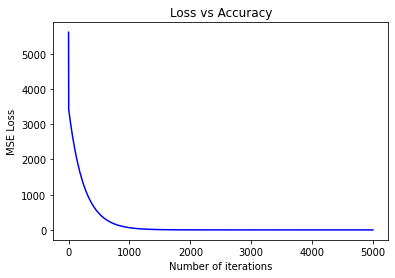

In [178]:
learningrate(0.002)

**Learning Rate: 0.003**

Average MSE loss for training data: 115.86653777439483


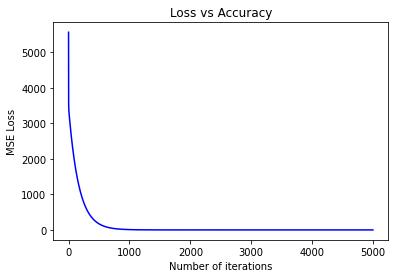

In [179]:
learningrate(0.003)

**Learning Rate: 0.004**

Average MSE loss for training data: 111924695865459.38


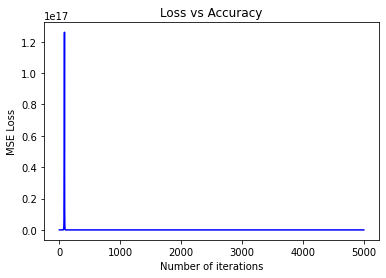

In [180]:
learningrate(0.004)

**Learning Rate: 1**

Average MSE loss for training data: nan


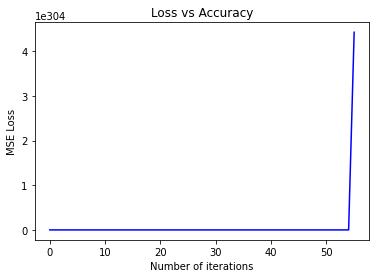

In [181]:
learningrate(1)

In [182]:
from tabulate import tabulate
# Assign Data
mydata = [["Learning Rate: 0.001", 346.1992418494282],["Learning Rate: 0.002", 173.5027085049254],
          ["Learning Rate: 0.003", 115.86653777439483],["Learning Rate: 0.004", 111924695865459.38],
          ["Learning Rate: 1", "NAN"]]
# Create Header
head = ["Learning Rate", "MSE loss for training data"]
# Display Table
print(tabulate(mydata, headers=head, tablefmt="grid", numalign="center"))

+----------------------+------------------------------+
| Learning Rate        |  MSE loss for training data  |
+======================+==============================+
| Learning Rate: 0.001 |           346.199            |
+----------------------+------------------------------+
| Learning Rate: 0.002 |           173.503            |
+----------------------+------------------------------+
| Learning Rate: 0.003 |           115.867            |
+----------------------+------------------------------+
| Learning Rate: 0.004 |         1.11925e+14          |
+----------------------+------------------------------+
| Learning Rate: 1     |             nan              |
+----------------------+------------------------------+


#####From the plots, we can show the accuracy vs iteration for different learning rate for training data. we have calculated MSE for accuracy. We can see different accuracy for different learning rates. We use same number of neurons and iteration which we used for previous question. It can be seen that our threshold learning rates is 0.003 which results better in accuracy values and network is converging though, but after that the average loss is increasing. We have tried learning rate closer to 1 which gave us average loss as ‘NAN’. So, for this network I think the best learning rate is 0.003.

**2.6 Effect of number of neurons in the hidden layer**

#####The update rule remains same for changing number of neurons. Only the sizes of weights and biases will change in the model. In plot red is predicted, blue is true.

In [183]:
# Load Dataset
x_train = np.loadtxt("/content/drive/MyDrive/X_train.csv")
x_test = np.loadtxt("/content/drive/MyDrive/X_test.csv")
y_train = np.loadtxt("/content/drive/MyDrive/Y_train.csv")
y_test = np.loadtxt("/content/drive/MyDrive/Y_test.csv")
y_train = np.reshape(y_train, (100, 1))
y_test = np.reshape(y_test, (50, 1))

input_neurons = 2              
output_neurons = 1
learning_rate = 0.001   
epoch = 5000

def hiddenneurons(hidden_neurons):

  W_1 = np.random.rand(hidden_neurons, input_neurons)   
  b_1 = np.random.rand(x_train.shape[0], hidden_neurons)
  W_2 = np.random.rand(output_neurons,hidden_neurons)
  b_2 = np.random.rand(x_train.shape[0],output_neurons)

  def sig(x):
    y = 1/(1 + np.exp(-x))
    return y

  def MSE(y1, y2):
    L = np.mean((y1 - y2)**2)
    return L

  loss_lst = []
  for i in range(5000):
    z_1 = np.dot(x_train, W_1.T) + b_1
    a_1 = sig(z_1)
    z_2 = np.dot(a_1, W_2.T) + b_2
    a_2 = z_2  

    # Updating the weight and bias of hidden layer and output layer for sigmoid function
    dz_2 = (a_2 - y_train)
    dW_2 = np.dot(dz_2.T, a_1)
    db_2 = dz_2
    dz_1 = dz_2.dot(W_2).dot(a_1.T).dot(1-(a_1))
    dW_1 = dz_1.T.dot(x_train)
    db_1 = dz_1
    W_1 = W_1 - learning_rate*dW_1
    b_1 = b_1 - learning_rate*db_1
    W_2 = W_2 - learning_rate*dW_2
    b_2 = b_2 - learning_rate*db_2

    # Calculate loss
    MSE_loss = MSE(a_2, y_train)
    loss_lst.append(MSE_loss)

  print("Average MSE loss for training data:", np.average(np.array(loss_lst)))
  warnings.filterwarnings('ignore')

  zT_1 = np.dot(x_test, W_1.T) + b_1[:50]
  aT_1 = sig(zT_1)
  zT_2 = np.dot(aT_1, W_2.T) + b_2[:50]
  aT_2 = (zT_2)

  lossT_lst = []
  # Calculate loss
  MSET_loss = MSE(aT_2, y_test)
  lossT_lst.append(MSET_loss)

  print("Average MSE loss for test data:", np.average(np.array(lossT_lst)))
  warnings.filterwarnings('ignore')

  epoch_lst = np.arange(epoch)
  plt.plot(epoch_lst, np.array(loss_lst), color = 'blue')
  plt.xlabel('Number of iterations')
  plt.ylabel('MSE Loss')
  plt.title('Loss vs Accuracy')
  plt.show()

  plt.plot(aT_2, color= 'red')
  plt.plot(y_test)
  plt.title('Predictied vs True output')
  plt.legend(loc="best")
  plt.show()

  return

**Number of neuron in hidden layer: 1**

Average MSE loss for training data: 350.0251524088472
Average MSE loss for test data: 5512.80036952101


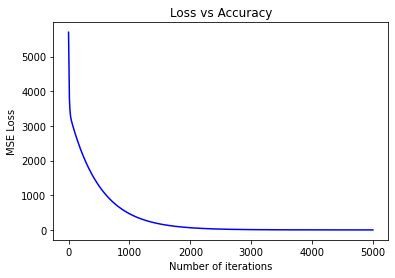

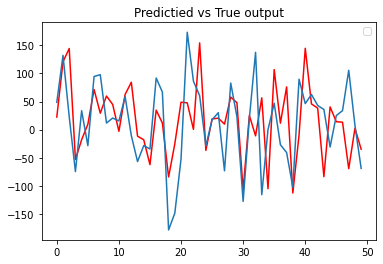

In [184]:
hiddenneurons(1)

**Number of neuron in hidden layer: 3**

Average MSE loss for training data: 347.14766310012493
Average MSE loss for test data: 5464.56367619305


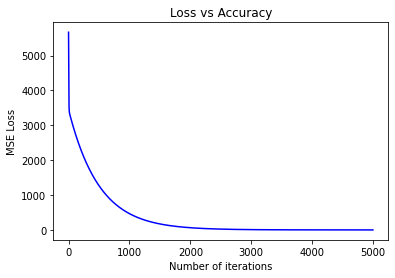

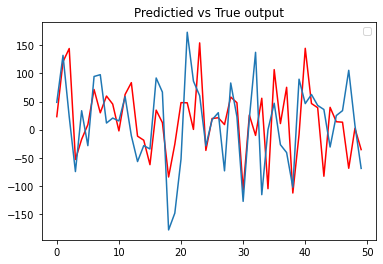

In [185]:
hiddenneurons(3)

**Number of neuron in hidden layer: 5**

Average MSE loss for training data: 347.18455630240834
Average MSE loss for test data: 5451.398758517999


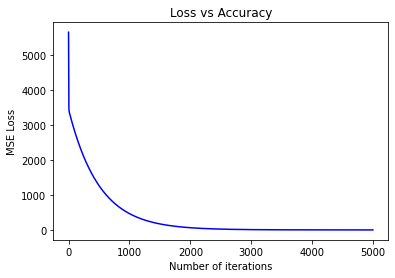

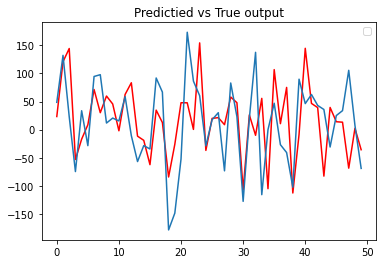

In [186]:
hiddenneurons(5)

**Number of neuron in hidden layer: 10**

Average MSE loss for training data: 346.0270576316013
Average MSE loss for test data: 5263.3495100567325


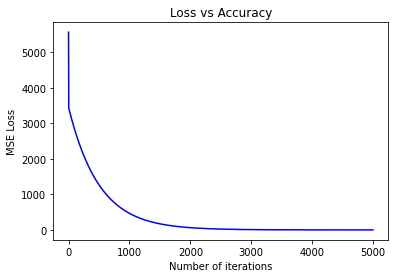

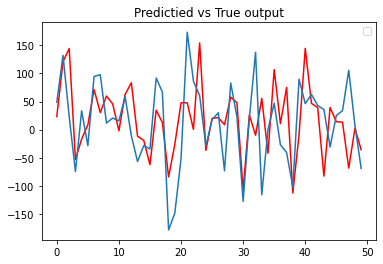

In [187]:
hiddenneurons(10)

In [188]:
# Assign Data
mydata = [["Number of neuron in hidden layer = 1", 350.0251524088472, 5512.80036952101],["Number of neuron in hidden layer = 3", 347.18455630240834, 5451.398758517999],
          ["Number of neuron in hidden layer = 5", 347.14766310012493, 5464.56367619305],["Number of neuron in hidden layer = 10", 346.0270576316013, 5263.3495100567325]]
# Create Header
head = ["Number of neuron in hidden layer", "MSE loss for training data", "MSE loss for testing data"]
# Display Table
print(tabulate(mydata, headers=head, tablefmt="grid", numalign="center"))

+---------------------------------------+------------------------------+-----------------------------+
| Number of neuron in hidden layer      |  MSE loss for training data  |  MSE loss for testing data  |
+=======================================+==============================+=============================+
| Number of neuron in hidden layer = 1  |           350.025            |           5512.8            |
+---------------------------------------+------------------------------+-----------------------------+
| Number of neuron in hidden layer = 3  |           347.185            |           5451.4            |
+---------------------------------------+------------------------------+-----------------------------+
| Number of neuron in hidden layer = 5  |           347.148            |           5464.56           |
+---------------------------------------+------------------------------+-----------------------------+
| Number of neuron in hidden layer = 10 |           346.027            | 

#####With a learning rate 0.001, it can be seen that average loss is decreasing for training and testing dataset with increased number of neurons in the hidden layer. 10 neurons are gaving us the least amount of loss.

**2.7 Effect of Activation Function**

Average MSE loss for training data: 535.9293868233306
Average MSE loss for test data: 10246.238454326582


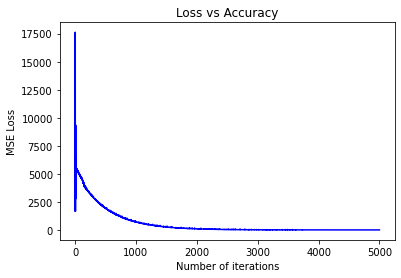

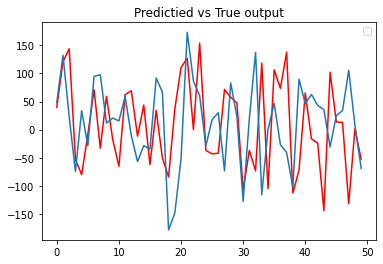

In [189]:
# Load Dataset
x_train = np.loadtxt("/content/drive/MyDrive/X_train.csv")
x_test = np.loadtxt("/content/drive/MyDrive/X_test.csv")
y_train = np.loadtxt("/content/drive/MyDrive/Y_train.csv")
y_test = np.loadtxt("/content/drive/MyDrive/Y_test.csv")
y_train = np.reshape(y_train, (100, 1))
y_test = np.reshape(y_test, (50, 1))

input_neurons = 2
hidden_neurons = 10              
output_neurons = 1
learning_rate = 0.001   
epoch = 5000

W_1 = np.random.rand(hidden_neurons, input_neurons)   
b_1 = np.random.rand(x_train.shape[0], hidden_neurons)
W_2 = np.random.rand(output_neurons,hidden_neurons)
b_2 = np.random.rand(x_train.shape[0],output_neurons)

def tanh(x):
  return (2/(1+np.exp(-2*x)))-1

def MSE(y1, y2):
  L = np.mean((y1 - y2)**2)
  return L

loss_lst = []
for i in range(5000):
  z_1 = np.dot(x_train, W_1.T) + b_1
  a_1 = tanh(z_1)
  z_2 = np.dot(a_1, W_2.T) + b_2
  a_2 = z_2  

  # Updating the weight and bias of hidden layer and output layer for sigmoid function
  dz_2 = (a_2 - y_train)
  dW_2 = np.dot(dz_2.T, a_1)
  db_2 = dz_2
  dz_1 = dz_2.dot(W_2).dot(a_1.T).dot(1-(a_1))
  dW_1 = dz_1.T.dot(x_train)
  db_1 = dz_1
  W_1 = W_1 - learning_rate*dW_1
  b_1 = b_1 - learning_rate*db_1
  W_2 = W_2 - learning_rate*dW_2
  b_2 = b_2 - learning_rate*db_2

  # Calculate loss
  MSE_loss = MSE(a_2, y_train)
  loss_lst.append(MSE_loss)

print("Average MSE loss for training data:", np.average(np.array(loss_lst)))
warnings.filterwarnings('ignore')

zT_1 = np.dot(x_test, W_1.T) + b_1[:50]
aT_1 = tanh(zT_1)
zT_2 = np.dot(aT_1, W_2.T) + b_2[:50]
aT_2 = (zT_2)

lossT_lst = []
# Calculate loss
MSET_loss = MSE(aT_2, y_test)
lossT_lst.append(MSET_loss)

print("Average MSE loss for test data:", np.average(np.array(lossT_lst)))
warnings.filterwarnings('ignore')

epoch_lst = np.arange(epoch)
plt.plot(epoch_lst, np.array(loss_lst), color = 'blue')
plt.xlabel('Number of iterations')
plt.ylabel('MSE Loss')
plt.title('Loss vs Accuracy')
plt.show()

plt.plot(aT_2, color= 'red')
plt.plot(y_test)
plt.title('Predictied vs True output')
plt.legend(loc="best")
plt.show()

#####We use tanh activation function in the hidden layer with linear activation function in the output layer. We can see Average MSE loss for training data is 535.9293868233306 which was 346.29076881589305 for sigmoid activation function with same kind of setup (same neurons, learning rate etc). 
#####So, for my case, sigmoid activation function in hidden layer along with linear activation function in output layer works better for 10 hidden neuron and 5000 iterations.